<center><font size="+4">BPM 2025/2026</font></center>
<center><font size="+2">University of Pisa, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Four Classes on Process Mining</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Notebook for Class 3 </font></center>
<center><font size="+2">Dependency graphs and Heuristic Miner
</font></center>

---
---

**Table of contents**<a id='toc0_'></a>    
- [How much do you know about pm4py?](#toc1_)    
- [Quality of discovered models](#toc2_)    
  - [Four Quality Criteria For Process Discovery](#toc2_1_)    
- [Dependency Graphs](#toc3_)    
  - [Dependency Graphs](#toc3_1_)    
  - [Learning Dependency Graphs with Heuristic miner](#toc3_2_)    
    - [Overview](#toc3_2_1_)    
    - [Frequencies matter! Dependency measure](#toc3_2_2_)    
    - [An example](#toc3_2_3_)    
    - [The algorithm](#toc3_2_4_)    
    - [Conclusions](#toc3_2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
url_github_repo_basic="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/"
url_github_repo=url_github_repo_basic+"BPM_PM/"
pm_slides=url_github_repo+'jupyter/jupyterNotebooks/images/PM/'

url_download="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/refs/heads/main/BPM_PM/jupyter/jupyterNotebooks/"

from IPython.display import Image, display

In [2]:
#Here we create a 'string' variable pointing to our repository...
url1 = url_download+'simplifiedCustomerComplaintHandling.xes'

urls=[url1]

import urllib.request
from pathlib import Path

for url in urls:
    print('Downloading',url)
    urllib.request.urlretrieve(url,Path(url).name)

# <a id='toc1_'></a>[How much do you know about pm4py?](#toc0_)
- Let's test it!

In [3]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

For an informed discussion on this topic, I recommend you watching classes of Module 4 of the [Coursera course on PM](https://www.coursera.org/learn/process-mining/home/welcome)
- https://www.coursera.org/learn/process-mining/home/module/4



> Below we provide screenshots from some slides used above

# <a id='toc2_'></a>[Quality of discovered models](#toc0_)

## <a id='toc2_1_'></a>[Four Quality Criteria For Process Discovery](#toc0_)

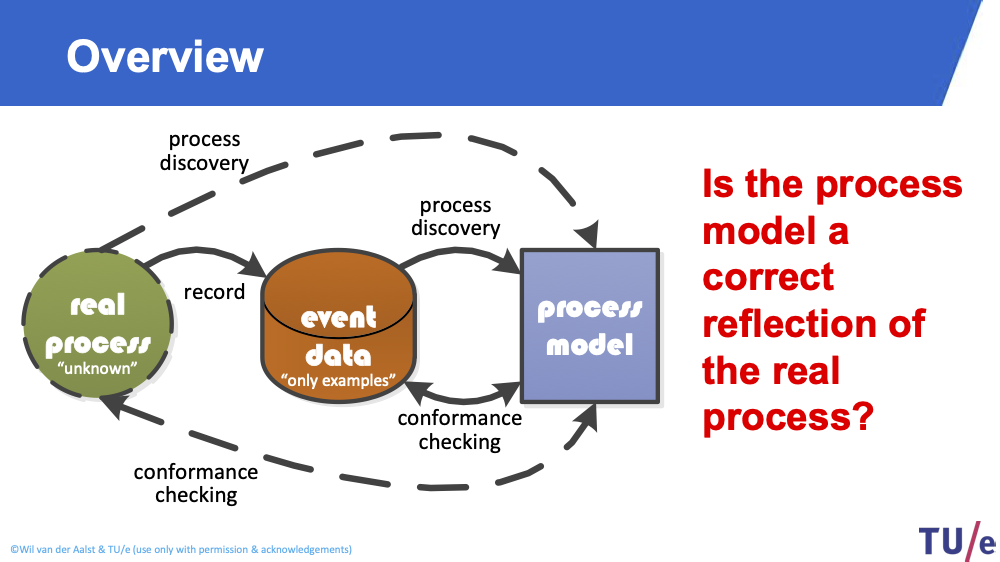

In [4]:
img=Image(pm_slides+'overviewPM.png',width=700)
display(img)

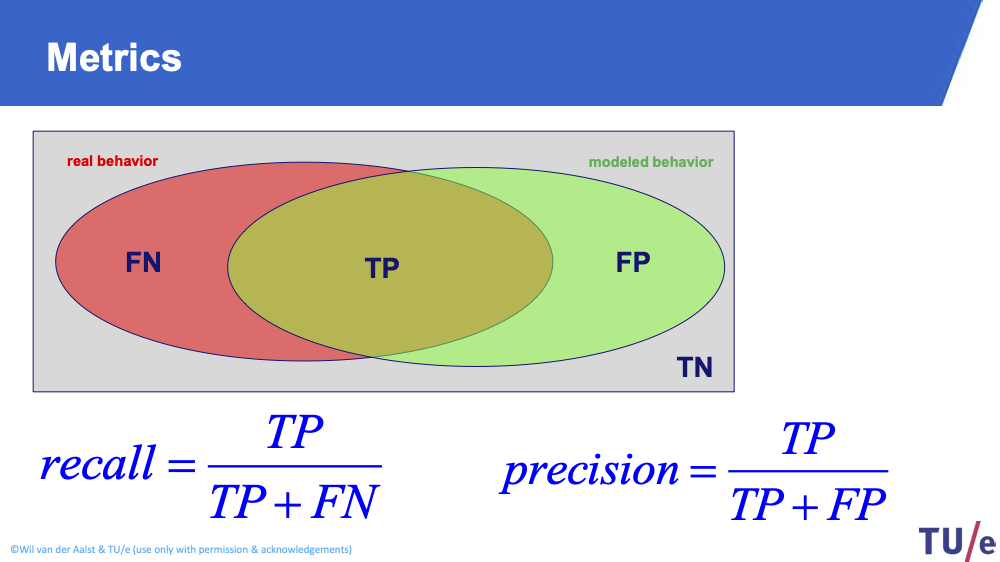

In [5]:
display(Image(pm_slides+'graphicalConfusionMetrics.png',width=700))

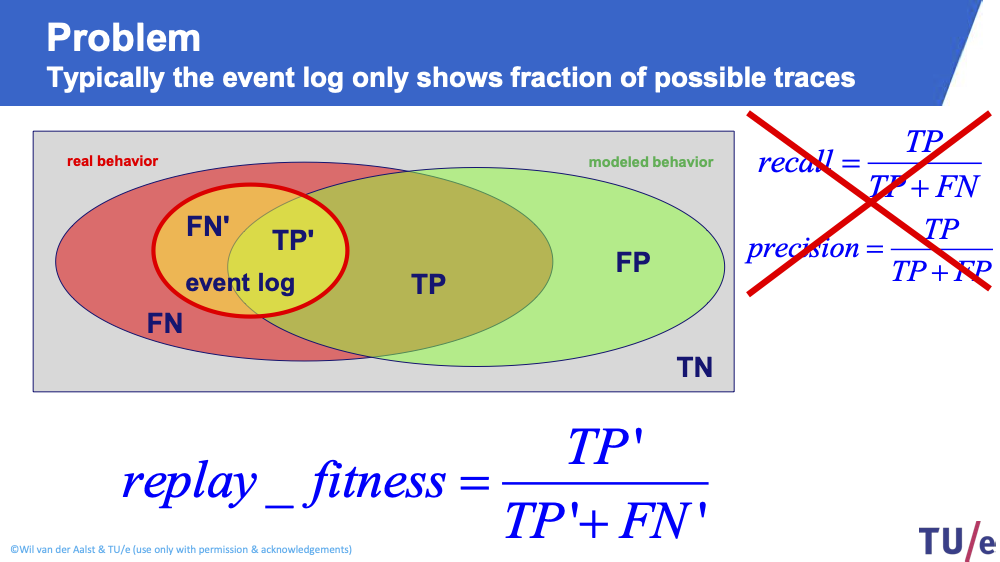

In [6]:
display(Image(pm_slides+'graphicalConfusionMetricsIssue.png',width=700))

Replay-fitness is essentially the classic Recall
- The only difference is that in PM people stresses that event logs are typically incomplete
- Also: we have a very unbalanced training set
  - The event log only contains positive examples (the 1), and not negative examples (the 0).
 
We are also interested in having a qualitative view on the labels
- Not all 0 are the same
- I want to know _how much wrong_ is a trace

Quality of a model:
- as usual in Data Science, we have trade offs!


How much of the traces in the log we can replicate 
- __Fitness__ vs __Simplicity__
  - __Fitness__: Ability to replay the observed behavior
    - Can we replay the log?
  - Simplicity: Keep model simple (Occam's razor)

How much of the traces NOT in the log we can generate <br/>
__Generalization__ vs __Precision__
- Generalization: Avoid overfitting
  - A model may become very complex to try describing precisely only the traces in the log
  - It has low generality 
- __Precision__: Avoid underfitting
  - We only produce traces appearing in the event log (maybe not all)

__Fitness__
- if we can replay all the traces in the event log (and don't care on whether we generate additional ones) we get 100%

__Precision__
- if we can replay only traces in the event log, maybe not all, but we don't generate any spurious traces we get 100%

The _flower model_ allows for 
- essentially any trace
- it has 100% fitness
- it has very low precision

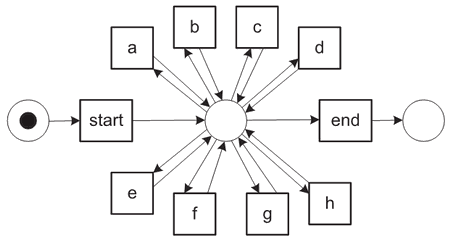

In [ ]:
display(Image('https://raw.github.com/alexeygrigorev/wiki-figures/master/ulb/bpm/pm/pm-flower.png',width=700))

# <a id='toc3_'></a>[Dependency Graphs](#toc0_)

## <a id='toc3_1_'></a>[Dependency Graphs](#toc0_)

__Dependency graphs__
- Are very important to get the _causal structure_ of the process
- Often, it is an intermediate model/representation given in input to algorithms that learn richer formalisms (e.g., __BPMN__ models)

We have seen them:
- in Disco!
- in pm4py!

/Users/andreavandin/Documents/GitHub/ComputingDataAnalysisModeling20252026/BPM_PM/jupyter/jupyterNotebooks/.venv/lib/python3.14/site-packages/pm4py/utils.py:964: UserWarning: Install the optional requirement `rustxes` to import/export files faster.
  warnings.warn("Install the optional requirement `rustxes` to import/export files faster.")
/Users/andreavandin/Documents/GitHub/ComputingDataAnalysisModeling20252026/BPM_PM/jupyter/jupyterNotebooks/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2200.96it/s]


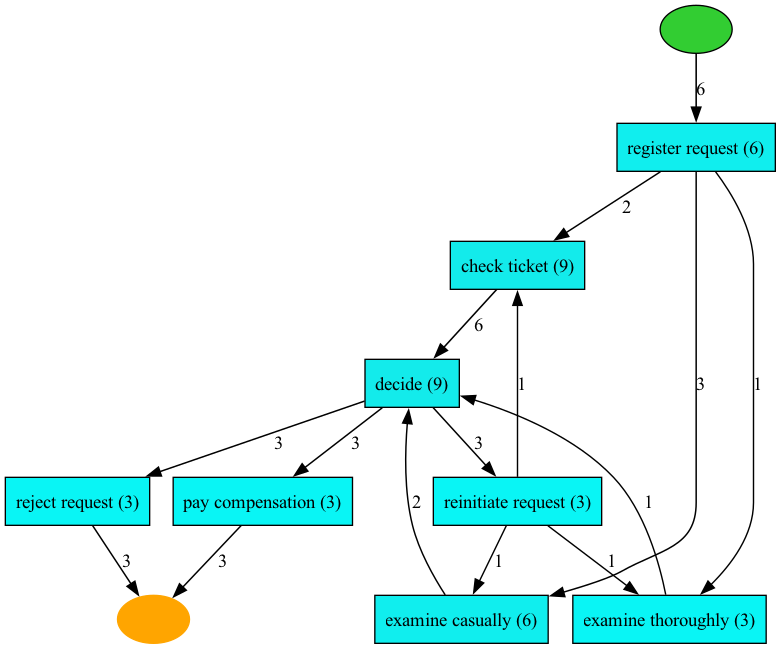

In [8]:
import pm4py 

event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

Or... open __Disco__!

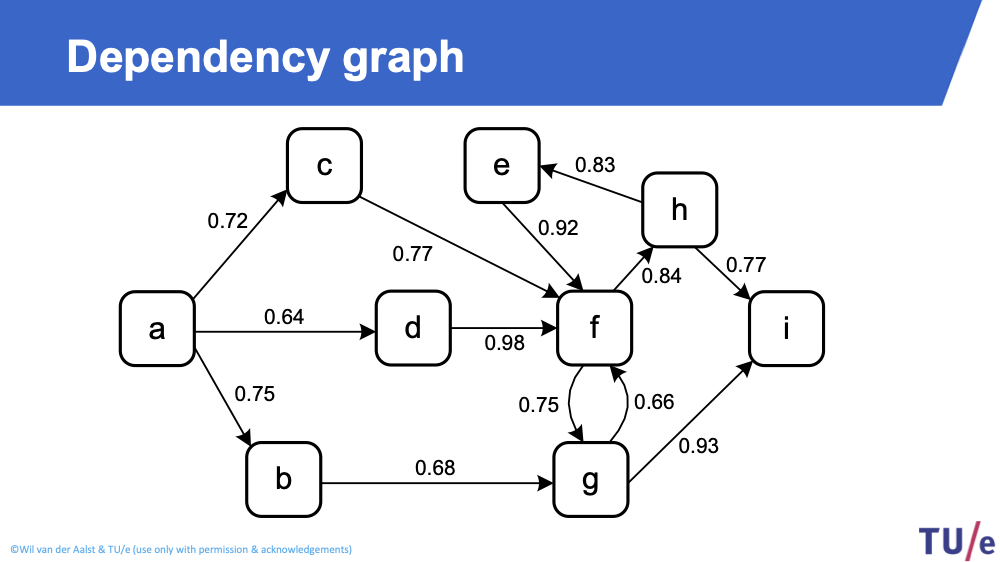

In [9]:
display(Image(pm_slides+'depGraph.png',width=700))

As we have discussed, in this graph
- Nodes are activities
- Edges are labeled with quantitative information
  - occurreneces
  - confidence in the presence of such edge

Furthermore, as we discussed, such a model 
- is not _executable_
- `f` has many incoming edges
  - We don't know how to execute it precisely
  - We do not have the _patterns_ we have seen in the previous class

In particular: the edges in a dependency graph
- correspond to the _sequence_ relation (the arrows) in the footprint of a log!

> Should I give for granted that you know what the footprint of a log is!?
> - Prof Bruni discussed it in the Alpha miner class
> - For a recap, this is an event log and its footprint 
>   - __Let's have a look at the relevant part in our extra notebook on Alpha miner__

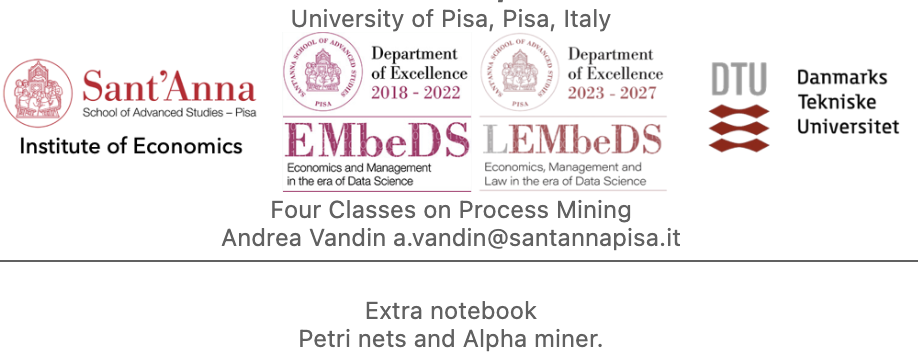

In [25]:
img=Image(pm_slides+'extraAlpha.png',width=700)
display(img)

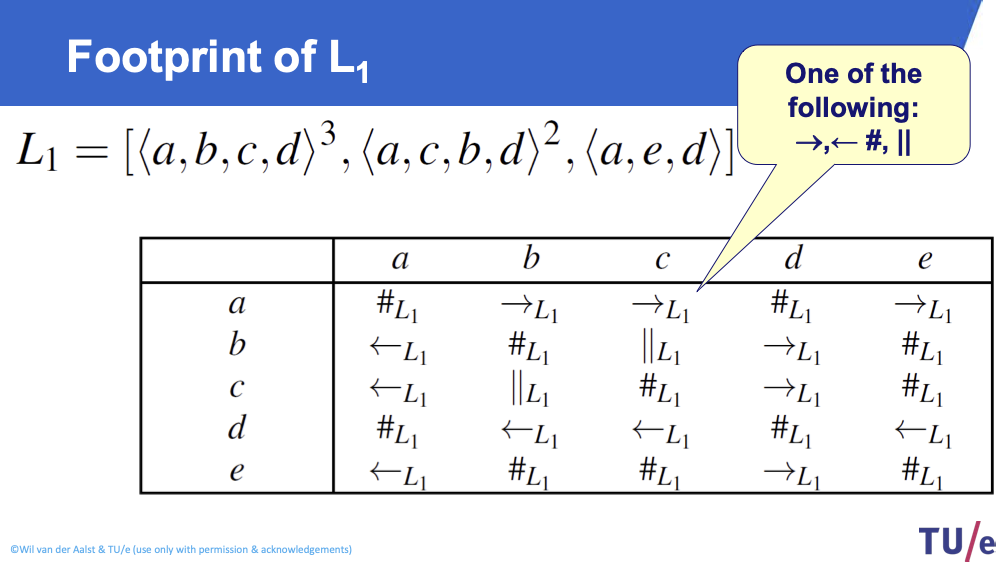

In [10]:
display(Image(pm_slides+'footprint.png',width=700))

You can also build the dependency graph underlying a Petri net
- just drop the places

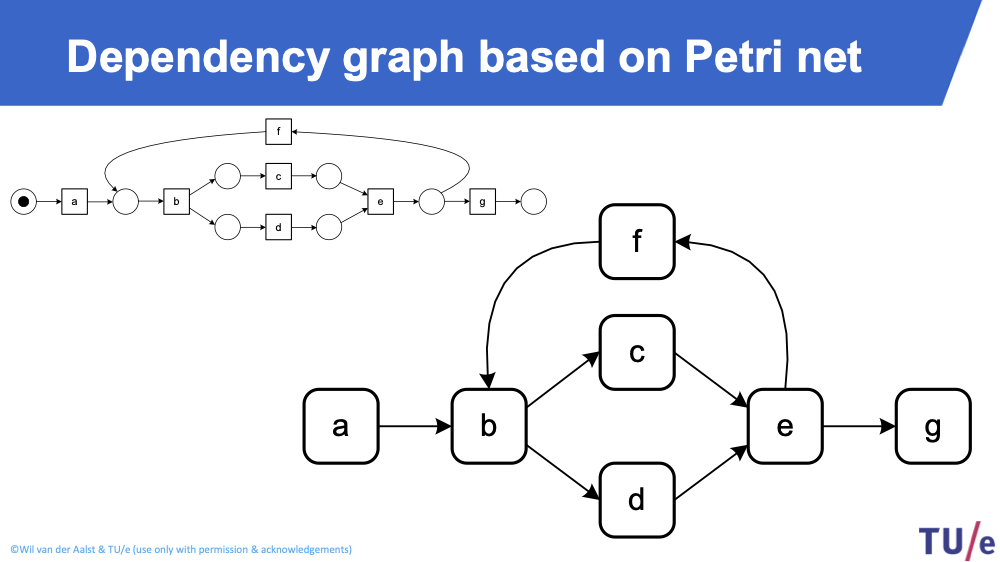

In [11]:
display(Image(pm_slides+'pn2dg.png',width=700))

We call dependency graphs _fuzzy models_
- No precise semantics: we can't execute them
- Can be created in many ways. Often using heuristics
- Most mining algorithms start from dependency graphs

__Causal nets__
- __NOT COVERED IN THIS COURSE__ 

There exist a sort of _richer dependency graphs_ known as __Causal nets (c-nets)__. These are 
- able to better represent the represent relations among activities
  - Do you remember XOR, OR, AND relations?
- are the actual output of several mining techniques
  - e.g., heuristic miner 
- still, they cannot be executed

We are not to treat them in details in this course. 
- Anyway, this picture should provide an intuitive overview to them

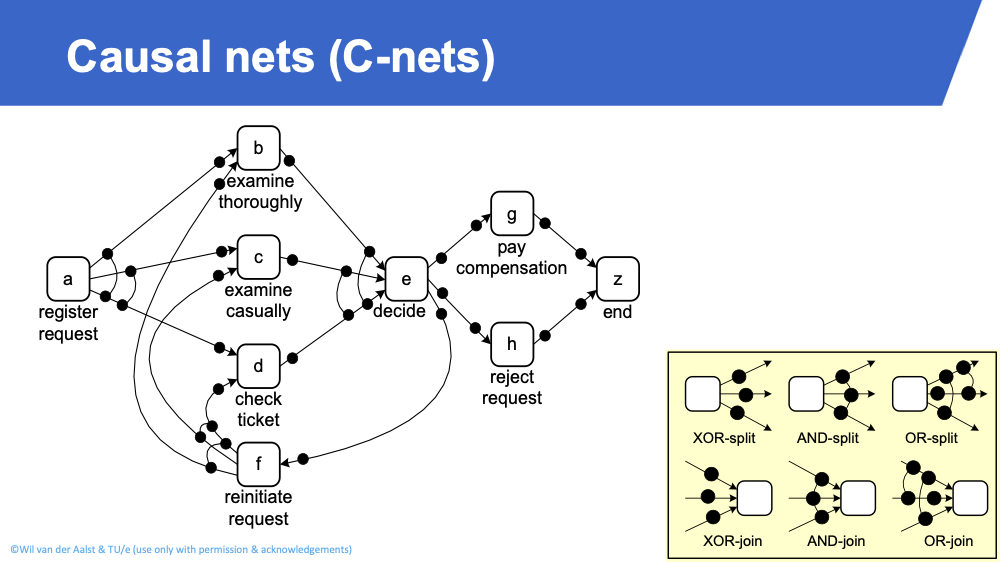

In [12]:
display(Image(pm_slides+'cnets.png',width=700))

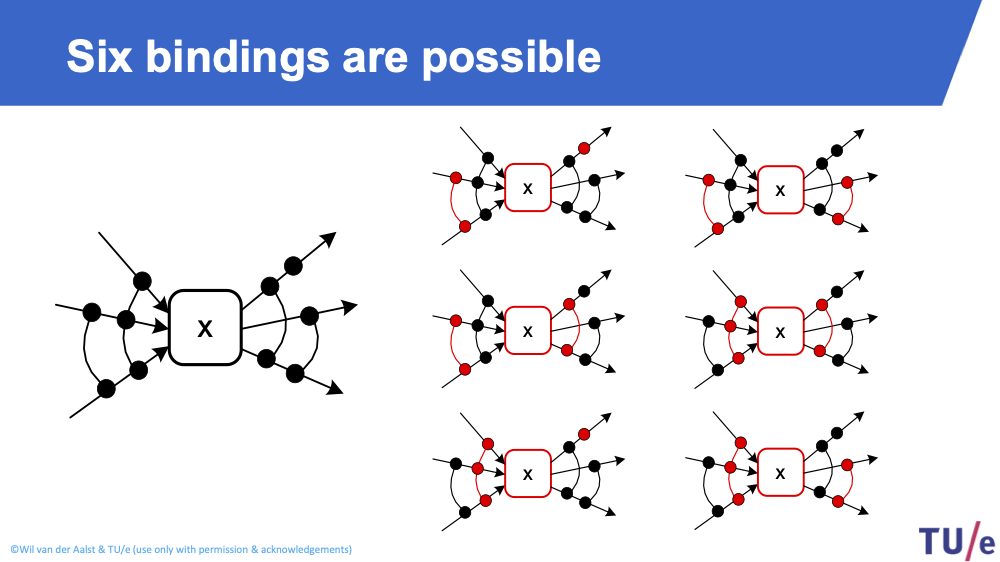

In [13]:
display(Image(pm_slides+'cnetsBindings.png',width=700))

## <a id='toc3_2_'></a>[Learning Dependency Graphs with Heuristic miner](#toc0_)

### <a id='toc3_2_1_'></a>[Overview](#toc0_)

A popular algorithm, heuristic mining consists of 2 steps
- Learn a dependency graph
- Feed the dependency graph to a second algorithm able to refine
  - the relations among activities
  - which will produce causal nets
- A third step can visualize/convert the model into Petri nets, BPMN, etc  

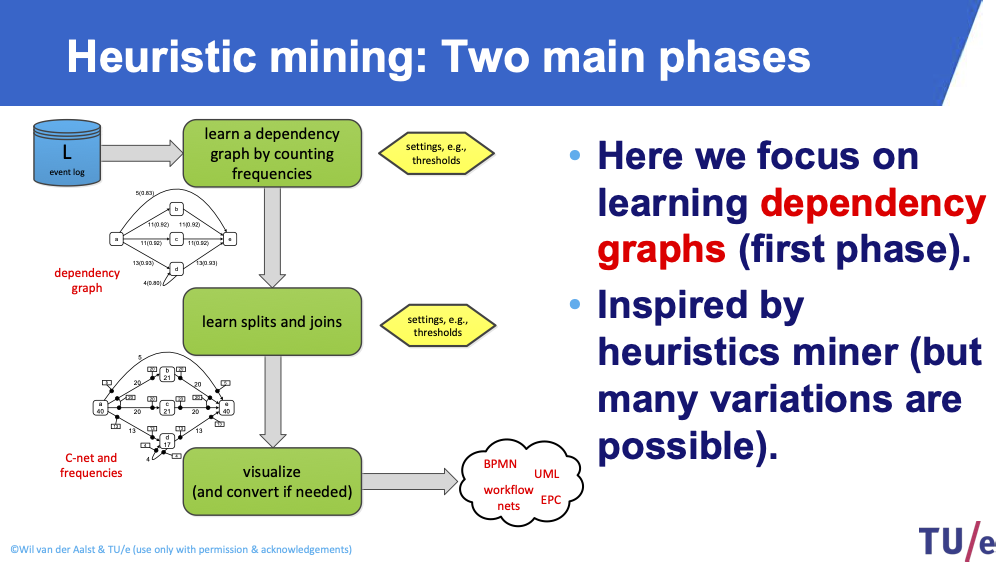

In [14]:
display(Image(pm_slides+'heuristicMining.png',width=700))

Here we focus on the first step

The library pm4py implements Heuristic miner:
- It does not just _count_ and put the counters in the dependency graph
- Rather than just counting,  it performs (simple) causality analyses...
  - It finds and __omits spurious directly follow pairs__ checking how often
    - the two activities happen together, and in which order
    - each single activity happens without the other
  - It is __NOT__ just a graphical representation of the data. It aims at discovering _concurrency_

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 3383.87it/s]


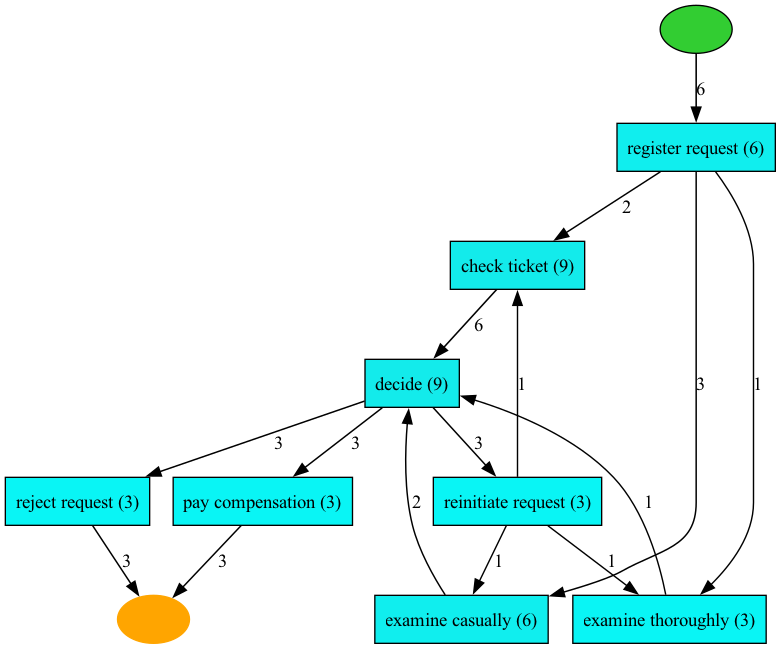

In [15]:
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

> Frequencies matter
> - Only relations __more important than a given threshold__ are reported
> - it is _similar_ to the Alpha miner for Petri nets, but it keeps into account frequencies

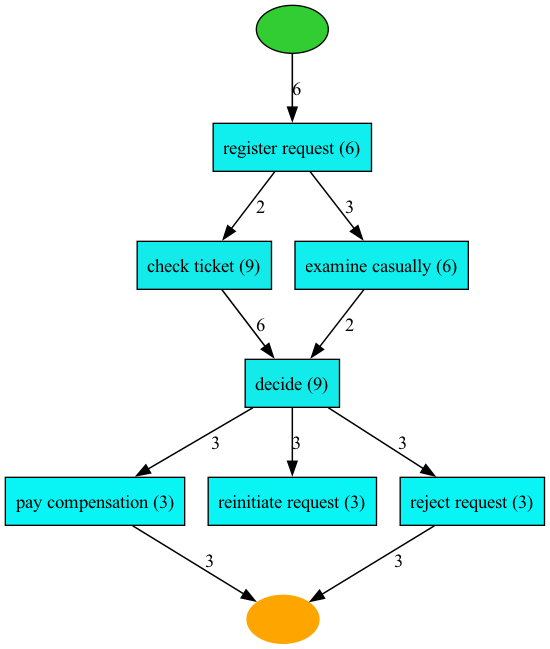

In [16]:
map = pm4py.discover_heuristics_net(event_log,dependency_threshold = 0.6)
pm4py.view_heuristics_net(map)

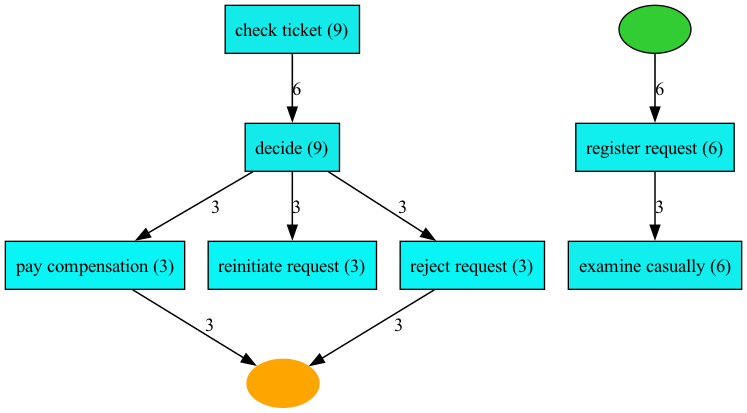

In [17]:
map = pm4py.discover_heuristics_net(event_log,dependency_threshold = 0.7)
pm4py.view_heuristics_net(map)

### <a id='toc3_2_2_'></a>[Frequencies matter! Dependency measure](#toc0_)

Frequencies matter!

We use weighted directly follow:
- Alpha miner uses a qualitative information: `a > b` which is `true/false`
- Heuristic miner uses a __quantitative__ information: __`|a > b| = n`__ where `n`
  - number of times that we find `b` directly following `a` in all  traces
  - possibly more than once per trace

From this, we can derive the dependency measure

> It is a weighted version of the Sequence from alpha miner:<br/>
> __Sequence `->`__
>   - `a->b`: `a>b` __and not__ `b>a`


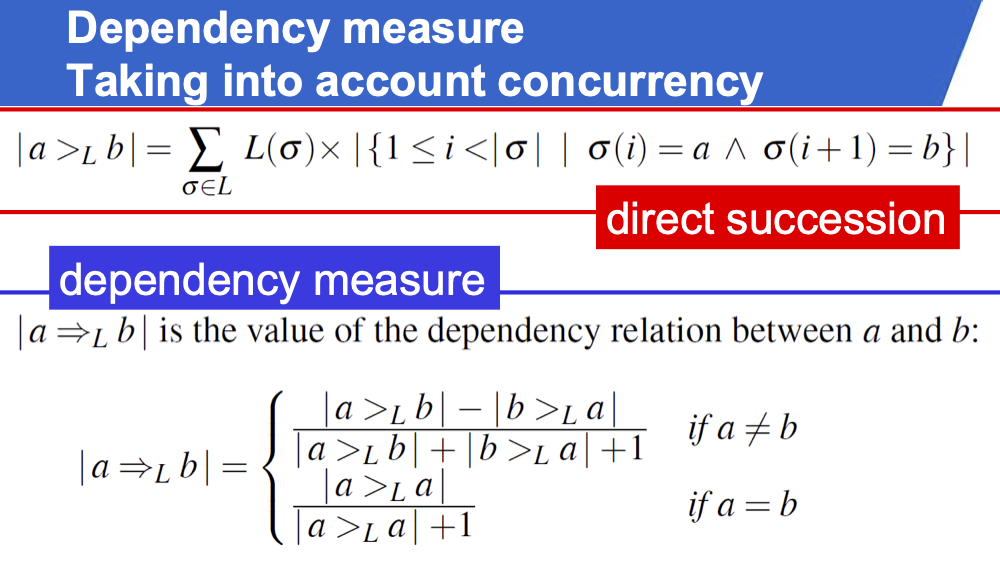

In [18]:
display(Image(pm_slides+'depMeasure.png',width=700))

Essentially, 
- rather than saying `a>b` __and not__ `b>a`
- we say enough `a>b` __and not enough__ `b>a`
  - The higher the value of `a => b`, the stronger is `a>b`
  - The lower the value of `a => b`, the stronger is `b>a`

We can graphically represent these two notions compactly

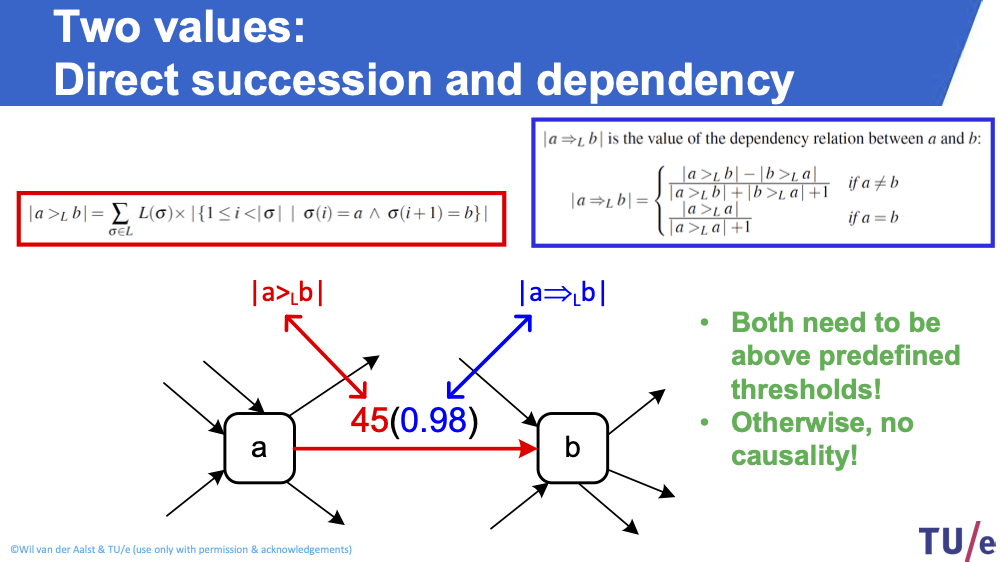

In [19]:
display(Image(pm_slides+'depMeasureEx.png',width=700))

Just to give you more intuition, consider this weighted Petri net pattern

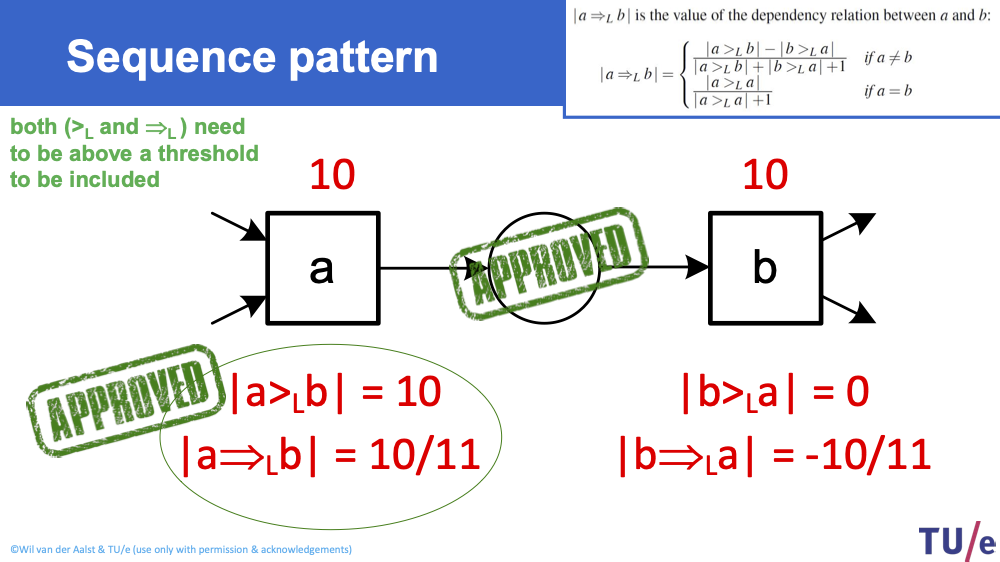

In [20]:
display(Image(pm_slides+'depMeasureEx2.png',width=700))

### <a id='toc3_2_3_'></a>[An example](#toc0_)

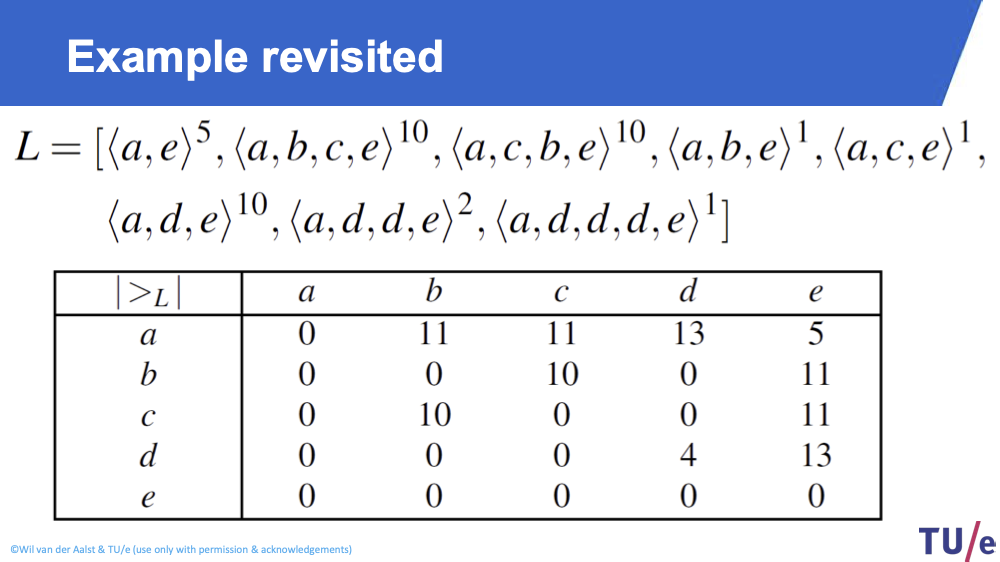

In [21]:
display(Image(pm_slides+'depMeasureEx3.png',width=700))

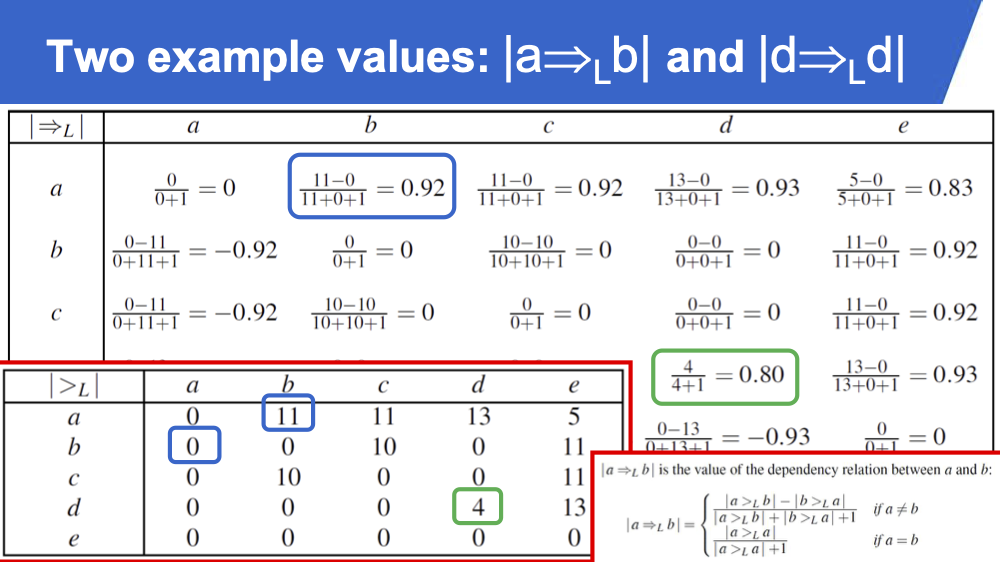

In [26]:
display(Image(pm_slides+'depMeasureEx3b.png',width=800))

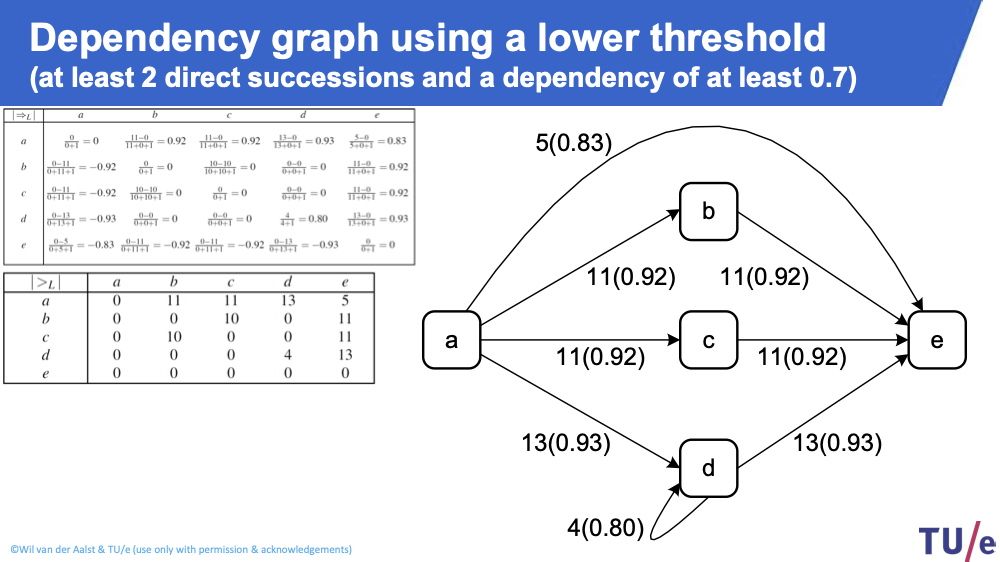

In [23]:
display(Image(pm_slides+'depMeasureEx3c.png',width=700))

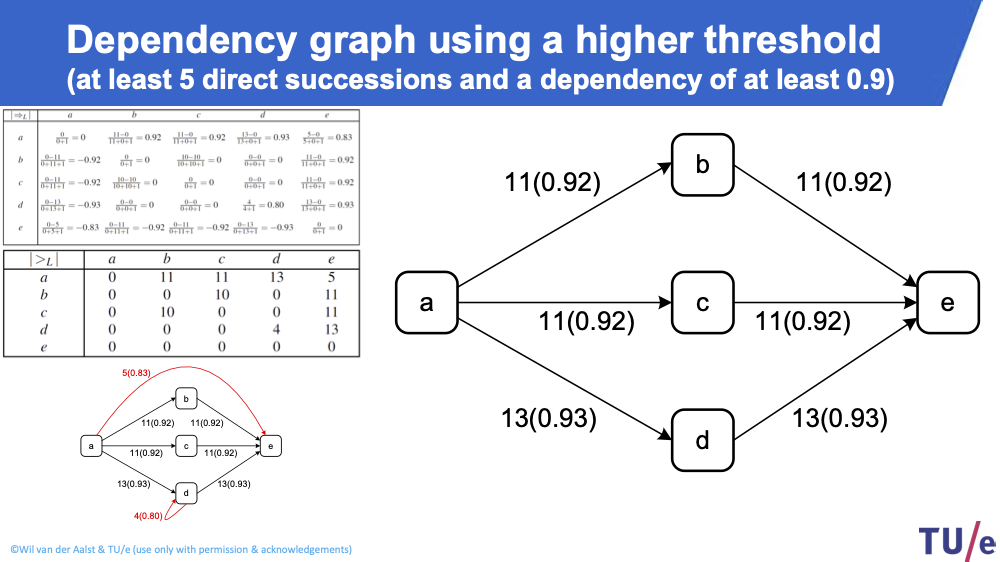

In [24]:
display(Image(pm_slides+'depMeasureEx3d.png',width=700))

### <a id='toc3_2_4_'></a>[The algorithm](#toc0_)

To summarize, the algorithm to discover dependency graphs is:
1. Count direct successions.
2. Compute dependency measures.
3. Set thresholds for the minimal number of direct
successions and the dependency measure.
4. Draw dependency graph while including only
arcs that meet both thresholds.

### <a id='toc3_2_5_'></a>[Conclusions](#toc0_)

Disco gives use dependency graphs (not exacty, but something very very similar)
- The threshold can be tuned using the right 'zooms'. If you recall, we have 2 zooms:
  - One for activities (which is trivial, one just counts how many times an activity happens)
  - One for path. That is based on the dependency measure.